In [8]:
from array import array

In [9]:
def seedLCG(initVal):
    global rand
    rand = initVal
    
def rand_ejb():
    a = 16807
    m = 2147483647
    b = 0
    global rand
    
    rand = (a*rand + b) % m
    return rand/m

elapsed time = 0.178
elapsed time = 28.015
Three-sigma Error = 0.009487


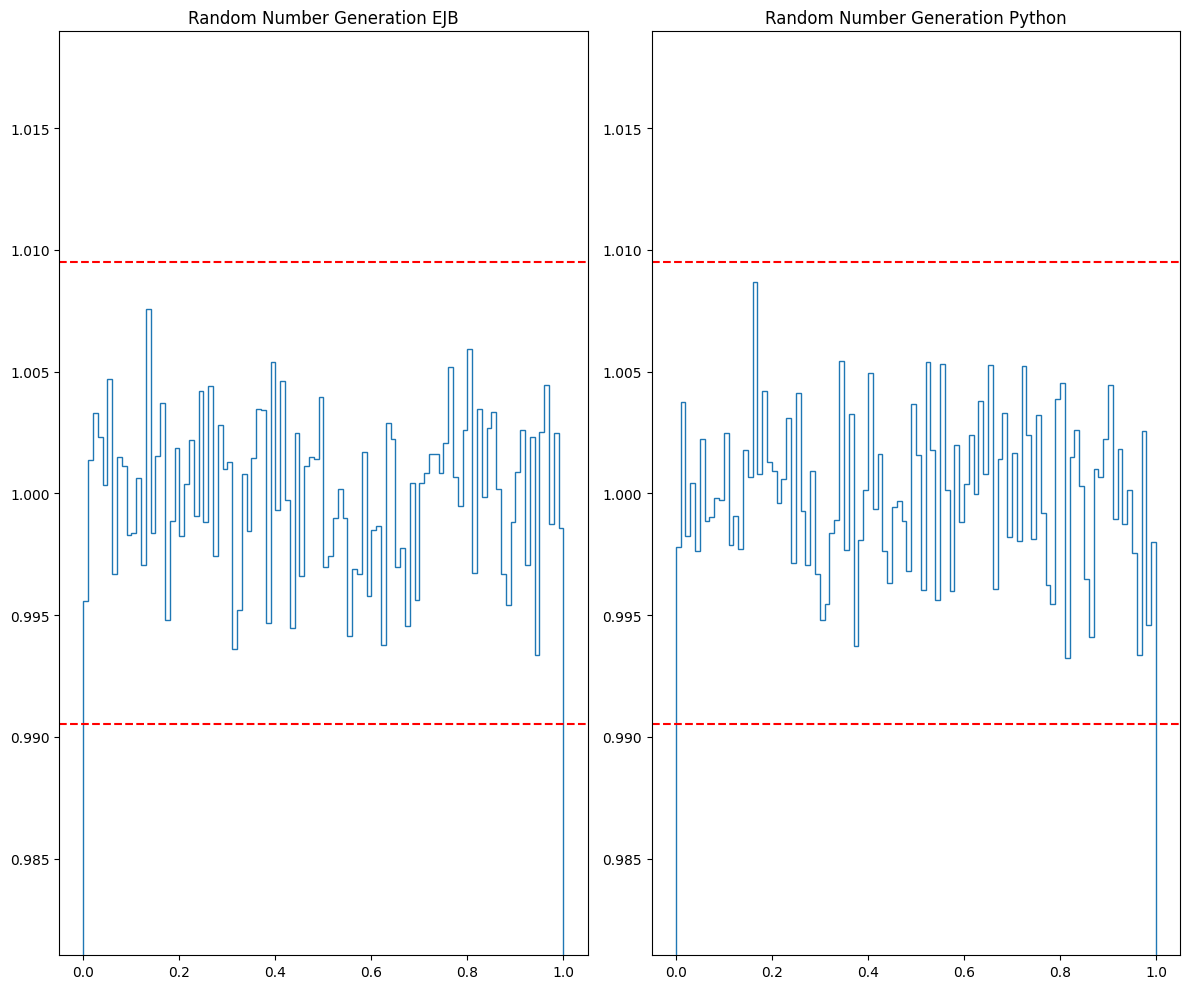

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# Set the seed for random number generation
iseed = 1
random.seed(iseed)
seedLCG(iseed)

# Define the number of points, seed, and number of bins
npoints = 10000000
nbins = 100

# Set the LCG seed
np.random.seed(iseed)

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

# Generate random numbers using the EJB algorithm and fill the histogram
ticks = time.time()
ejb_data = np.random.rand(npoints)
axs[0].hist(ejb_data, bins=nbins, range=(0.0, 1.0), histtype='step', density=True)
ticks2 = time.time()
print("elapsed time = %.3f" % (ticks2 - ticks))

# Generate random numbers using the Python random module and fill the histogram
ticks3 = time.time()
python_data = [random.uniform(0.0, 1.0) for _ in range(npoints)]
axs[1].hist(python_data, bins=nbins, range=(0.0, 1.0), histtype='step', density=True)
ticks4 = time.time()
print("elapsed time = %.3f" % (ticks4 - ticks3))

# Calculate the three-sigma error
error = 3.0 / np.sqrt(npoints / nbins)
print("Three-sigma Error = %f" % error)

# Add horizontal lines for error
for ax in axs:
    ax.axhline(1 + error, color='r', linestyle='--')
    ax.axhline(1 - error, color='r', linestyle='--')

# Set the y-axis range for both subplots
for ax in axs:
    ax.set_ylim(1 - 2 * error, 1.0 + 2 * error)

# Set titles for subplots
axs[0].set_title('Random Number Generation EJB')
axs[1].set_title('Random Number Generation Python')

# Show the plots
plt.tight_layout()
plt.show()

